# Models and Maps

## Models

Let's again consider the car dataset from second notebook.

In that notebook we plotted *qsec* as a function of *hp*. However we might be interested a better model. Let's load the data.

In [2]:
library(tidyverse)

data(mtcars)

mtcars_tbl <- as_tibble(rownames_to_column(mtcars,var='model'))

str(mtcars_tbl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32 obs. of  12 variables:
 $ model: chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl  : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp : num  160 160 108 258 360 ...
 $ hp   : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt   : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec : num  16.5 17 18.6 19.4 17 ...
 $ vs   : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am   : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear : num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb : num  4 4 1 1 2 1 4 2 2 4 ...


Now let's fit three different linear models with `lm` from `stats`-package [[lm]](https://www.rdocumentation.org/packages/stats/versions/3.4.3/topics/lm).

First model will be `qsec ~ wt`, while second will be `qsec ~ hp`. Let's combine both of these effects into a third model `qsec ~ hp / wt`.

`summary` will show a summary of the model.

In [6]:
lm1_model <- function(data) lm(qsec ~ wt,      data=data)
lm2_model <- function(data) lm(qsec ~ hp,      data=data)
lm3_model <- function(data) lm(qsec ~ hp + wt, data=data)

summary(lm1_model(mtcars_tbl))
summary(lm2_model(mtcars_tbl))
summary(lm3_model(mtcars_tbl))


Call:
lm(formula = qsec ~ wt, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3638 -1.0766  0.2051  0.8655  5.0298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8753     1.1025  17.120   <2e-16 ***
wt           -0.3191     0.3283  -0.972    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 30 degrees of freedom
Multiple R-squared:  0.03053,	Adjusted R-squared:  -0.00179 
F-statistic: 0.9446 on 1 and 30 DF,  p-value: 0.3389



Call:
lm(formula = qsec ~ hp, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1766 -0.6975  0.0348  0.6520  4.0972 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.556354   0.542424  37.897  < 2e-16 ***
hp          -0.018458   0.003359  -5.495 5.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 30 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.485 
F-statistic: 30.19 on 1 and 30 DF,  p-value: 5.766e-06



Call:
lm(formula = qsec ~ hp + wt, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8283 -0.4055 -0.1464  0.3519  3.7030 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.825585   0.671867  28.020  < 2e-16 ***
hp          -0.027310   0.003795  -7.197 6.36e-08 ***
wt           0.941532   0.265897   3.541  0.00137 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.09 on 29 degrees of freedom
Multiple R-squared:  0.652,	Adjusted R-squared:  0.628 
F-statistic: 27.17 on 2 and 29 DF,  p-value: 2.251e-07


In [5]:
iris_tbl %>%
    add_predictions(iris_lm) %>%
    ggplot(aes(x=Petal.Length)) +
    geom_point(aes(y=Petal.Width), shape=1) +
    geom_line(aes(y=pred))

ERROR: Error in eval(lhs, parent, parent): object 'iris_tbl' not found


In [4]:
library(modelr)

iris_lm <- lm(Petal.Width ~ Petal.Length, data=iris_tbl)

iris_lm_data <- iris_tbl %>%
    data_grid(Petal.Length) %>%
    add_predictions(iris_lm)

ERROR: Error in is.data.frame(data): object 'iris_tbl' not found


One can add arbitrary amount of terms into these models. There's plenty of other models in R libraries one might want to use.

# Nesting

Let's say we want to calculate the same models for each group specified by a cylinder. 

This means we need to do iteration over the groups and for this to work, we should split the data into chunks that will be iterated over. 

To do this we can use the `nest`-function ([[nest]](http://tidyr.tidyverse.org/reference/nest.html)).

In [8]:
mtcars_nested <- mtcars_tbl %>%
    # Convert cyl into a factor
    mutate_at(vars(cyl),as.factor) %>%
    # Group by cyl
    group_by(cyl) %>%
    # Nest the data
    nest()

print(mtcars_nested)

# A tibble: 3 x 2
  cyl   data              
  <fct> <list>            
1 6     <tibble [7 × 11]> 
2 4     <tibble [11 × 11]>
3 8     <tibble [14 × 11]>


This produces a `tibble` where all data is stored in a column of a type `list` and name *data*.

## Maps

### Example 1: running linear models on groups

Now that we have our list to iterate over, we can use `map` to do the iteration.

`map` is provided by the purrr-package. There are variants of it based on the return value of the used function. 

In this case we receive the results for a model as strange S3-objects, so we want to use the `map`-function that creates a list from the outputs [[map]](http://purrr.tidyverse.org/reference/map.html).

In [9]:
# Map each data to model, pipe resulting fits to summary-function
map(mtcars_nested$data,lm3_model) %>%
    map(summary)

[[1]]

Call:
lm(formula = qsec ~ hp + wt, data = data)

Residuals:
       1        2        3        4        5        6        7 
-0.09309 -0.44104  0.76835  0.53516 -0.80659 -0.20659  0.24380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 10.32289    3.30597   3.123   0.0354 *
hp          -0.02817    0.01197  -2.354   0.0782 .
wt           3.56060    0.81460   4.371   0.0120 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6769 on 4 degrees of freedom
Multiple R-squared:  0.8952,	Adjusted R-squared:  0.8427 
F-statistic: 17.08 on 2 and 4 DF,  p-value: 0.01099


[[2]]

Call:
lm(formula = qsec ~ hp + wt, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94943 -0.64162  0.02955  0.48194  2.30231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.42968    2.26198   7.263 8.69e-05 ***
hp          -0.02312    0.02060  -1.122   0.2942    
wt           2.02

A more *tidyverse*-approach to using the `map` is to use it with `mutate` to store the fits into a new columns. This makes it easy to run multiple models and store their results.

In [10]:
mtcars_nested <- mtcars_nested %>%
    mutate(
        model1=map(data, lm1_model),
        model2=map(data, lm2_model),
        model3=map(data, lm3_model)
    )

# Check structure
print(mtcars_nested)

# A tibble: 3 x 5
  cyl   data               model1 model2 model3
  <fct> <list>             <list> <list> <list>
1 6     <tibble [7 × 11]>  <lm>   <lm>   <lm>  
2 4     <tibble [11 × 11]> <lm>   <lm>   <lm>  
3 8     <tibble [14 × 11]> <lm>   <lm>   <lm>  


Package `broom` comes with nice functions `tidy` and `glance` that can be used to obtain coefficients or tests of the models in nice tibbles [[broom vignette]](https://cran.r-project.org/web/packages/broom/vignettes/broom.html).

In [11]:
library(broom)

tidy(mtcars_nested$model3[[1]])

glance(mtcars_nested$model3[[1]])


Attaching package: ‘broom’


The following object is masked from ‘package:modelr’:

    bootstrap




term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),10.32288928,3.3059662,3.122503,0.03544082
hp,-0.02816895,0.0119651,-2.354260,0.07815096
wt,3.56060466,0.8146002,4.370984,0.01195887


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.8951596,0.8427394,0.6768763,17.07662,0.01099151,3,-5.242047,18.48409,18.26773,1.832646,4


Let's use `tidy` to get the model parameters.

In [12]:
mtcars_nested <- mtcars_nested %>%
    mutate(
        model1_coefs=map(model3,tidy),
        model2_coefs=map(model3,tidy),
        model3_coefs=map(model3,tidy)
    )

print(mtcars_nested)

# A tibble: 3 x 8
  cyl   data      model1 model2 model3 model1_coefs  model2_coefs  model3_coefs 
  <fct> <list>    <list> <list> <list> <list>        <list>        <list>       
1 6     <tibble … <lm>   <lm>   <lm>   <tibble [3 ×… <tibble [3 ×… <tibble [3 ×…
2 4     <tibble … <lm>   <lm>   <lm>   <tibble [3 ×… <tibble [3 ×… <tibble [3 ×…
3 8     <tibble … <lm>   <lm>   <lm>   <tibble [3 ×… <tibble [3 ×… <tibble [3 ×…


Let's limit ourselves to model no. 3, as that is the most interesting  and use `unnest` to unnest the coefficients.

In [13]:
mtcars_model3 <- mtcars_nested %>%
    select(cyl,model3_coefs) %>%
    unnest(model3_coefs)

print(mtcars_model3)

# A tibble: 9 x 6
  cyl   term        estimate std.error statistic  p.value
  <fct> <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 6     (Intercept)  10.3      3.31         3.12 3.54e- 2
2 6     hp           -0.0282   0.0120      -2.35 7.82e- 2
3 6     wt            3.56     0.815        4.37 1.20e- 2
4 4     (Intercept)  16.4      2.26         7.26 8.69e- 5
5 4     hp           -0.0231   0.0206      -1.12 2.94e- 1
6 4     wt            2.02     0.757        2.67 2.84e- 2
7 8     (Intercept)  17.1      0.859       19.9  5.75e-10
8 8     hp           -0.0180   0.00252     -7.13 1.93e- 5
9 8     wt            0.866    0.169        5.12 3.32e- 4


### Example 2: Getting summaries of subgroups

Lets say we want to store statistics calculated from `iris`-dataset with our data. Let's nest the data.

In [14]:
iris_nested <- as_tibble(iris) %>%
    group_by(Species) %>%
    nest()

print(iris_nested)

# A tibble: 3 x 2
  Species    data             
  <fct>      <list>           
1 setosa     <tibble [50 × 4]>
2 versicolor <tibble [50 × 4]>
3 virginica  <tibble [50 × 4]>


Now the data belonging to each species is stored in the data-variable. Now we cannot, however just use summarize the data as the summary would not be done against the `tibble` stored in the data. Instead we need to define a function that acts on the data itself and use a map that acts on the list on which the data-`tibble`s are stored.

In [15]:
iris_statistics <- function(tbl) {
    return(as_tibble(tbl %>%
        summarize(
            Petal.Length_mean=mean(Petal.Length),
            Petal.Width_mean=mean(Petal.Width),
            Petal.Length_var=var(Petal.Length),
            Petal.Width_var=var(Petal.Width),
            Petal_cor=cor(Petal.Length,Petal.Width)))
    )
}

as_tibble(iris) %>%
    group_by(Species) %>%
    iris_statistics()

Species,Petal.Length_mean,Petal.Width_mean,Petal.Length_var,Petal.Width_var,Petal_cor
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,1.462,0.246,0.03015918,0.01110612,0.3316300
versicolor,4.260,1.326,0.22081633,0.03910612,0.7866681
virginica,5.552,2.026,0.30458776,0.07543265,0.3221082


On nested data the function is used with:

In [16]:
iris_nested <- iris_nested %>%
    mutate(statistics=map(data,iris_statistics))

print(iris_nested)

# A tibble: 3 x 3
  Species    data              statistics      
  <fct>      <list>            <list>          
1 setosa     <tibble [50 × 4]> <tibble [1 × 5]>
2 versicolor <tibble [50 × 4]> <tibble [1 × 5]>
3 virginica  <tibble [50 × 4]> <tibble [1 × 5]>


Now our statistics are stored in the variable `statistics`. They are not that easy to access, though. Let's use `unnest` to reverse the nesting in the `statistics`-variable.

In [17]:
iris_nested <- iris_nested %>%
    unnest(statistics)

print(iris_nested)

# A tibble: 3 x 7
  Species data  Petal.Length_me… Petal.Width_mean Petal.Length_var
  <fct>   <lis>            <dbl>            <dbl>            <dbl>
1 setosa  <tib…             1.46            0.246           0.0302
2 versic… <tib…             4.26            1.33            0.221 
3 virgin… <tib…             5.55            2.03            0.305 
# … with 2 more variables: Petal.Width_var <dbl>, Petal_cor <dbl>


# Exercise time:

Do this exercise to `storms`-dataset initialized below that is a subset of NOAA Atlantic hurricane database [[storms]](http://dplyr.tidyverse.org/reference/storms.html).

1. Group the dataset based on `name`. Nest the data.
2. Use map to calculate the minimum pressure, maximum wind speed and maximum category for each storm. Store these to the object. Unwind them into variables.
3. Plot a scatterplot with x-axis showing minimum pressure, y-axis showing maximum wind speed and colour showing maximum category.

In [18]:
data(storms)

str(storms)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	10010 obs. of  13 variables:
 $ name       : chr  "Amy" "Amy" "Amy" "Amy" ...
 $ year       : num  1975 1975 1975 1975 1975 ...
 $ month      : num  6 6 6 6 6 6 6 6 6 6 ...
 $ day        : int  27 27 27 27 28 28 28 28 29 29 ...
 $ hour       : num  0 6 12 18 0 6 12 18 0 6 ...
 $ lat        : num  27.5 28.5 29.5 30.5 31.5 32.4 33.3 34 34.4 34 ...
 $ long       : num  -79 -79 -79 -79 -78.8 -78.7 -78 -77 -75.8 -74.8 ...
 $ status     : chr  "tropical depression" "tropical depression" "tropical depression" "tropical depression" ...
 $ category   : Ord.factor w/ 7 levels "-1"<"0"<"1"<"2"<..: 1 1 1 1 1 1 1 1 2 2 ...
 $ wind       : int  25 25 25 25 25 25 25 30 35 40 ...
 $ pressure   : int  1013 1013 1013 1013 1012 1012 1011 1006 1004 1002 ...
 $ ts_diameter: num  NA NA NA NA NA NA NA NA NA NA ...
 $ hu_diameter: num  NA NA NA NA NA NA NA NA NA NA ...


# Solutions:

## 1.

In [19]:
storms_nested <- storms %>%
    mutate(name=as.factor(name)) %>%
    group_by(name) %>%
    nest()

print(storms_nested)

# A tibble: 198 x 2
   name     data               
   <fct>    <list>             
 1 Amy      <tibble [30 × 12]> 
 2 Caroline <tibble [33 × 12]> 
 3 Doris    <tibble [23 × 12]> 
 4 Belle    <tibble [18 × 12]> 
 5 Gloria   <tibble [125 × 12]>
 6 Anita    <tibble [20 × 12]> 
 7 Clara    <tibble [24 × 12]> 
 8 Evelyn   <tibble [9 × 12]>  
 9 Amelia   <tibble [6 × 12]>  
10 Bess     <tibble [13 × 12]> 
# … with 188 more rows


## 2.

In [20]:
storm_stats <- function(storm_data) {
    output <- storm_data %>%
        summarize(min_pressure=min(pressure),max_wind=max(wind),max_category=max(category))
}

storms_nested <- storms_nested %>%
    mutate(stats=map(data,storm_stats)) %>%
    unnest(stats)

print(storms_nested)

# A tibble: 198 x 5
   name     data                min_pressure max_wind max_category
   <fct>    <list>                     <int>    <int> <ord>       
 1 Amy      <tibble [30 × 12]>           981       60 0           
 2 Caroline <tibble [33 × 12]>           963      100 3           
 3 Doris    <tibble [23 × 12]>           965       95 2           
 4 Belle    <tibble [18 × 12]>           957      105 3           
 5 Gloria   <tibble [125 × 12]>          920      125 4           
 6 Anita    <tibble [20 × 12]>           926      150 5           
 7 Clara    <tibble [24 × 12]>           993       65 1           
 8 Evelyn   <tibble [9 × 12]>            994       70 1           
 9 Amelia   <tibble [6 × 12]>           1005       45 0           
10 Bess     <tibble [13 × 12]>          1005       45 0           
# … with 188 more rows


## 3.

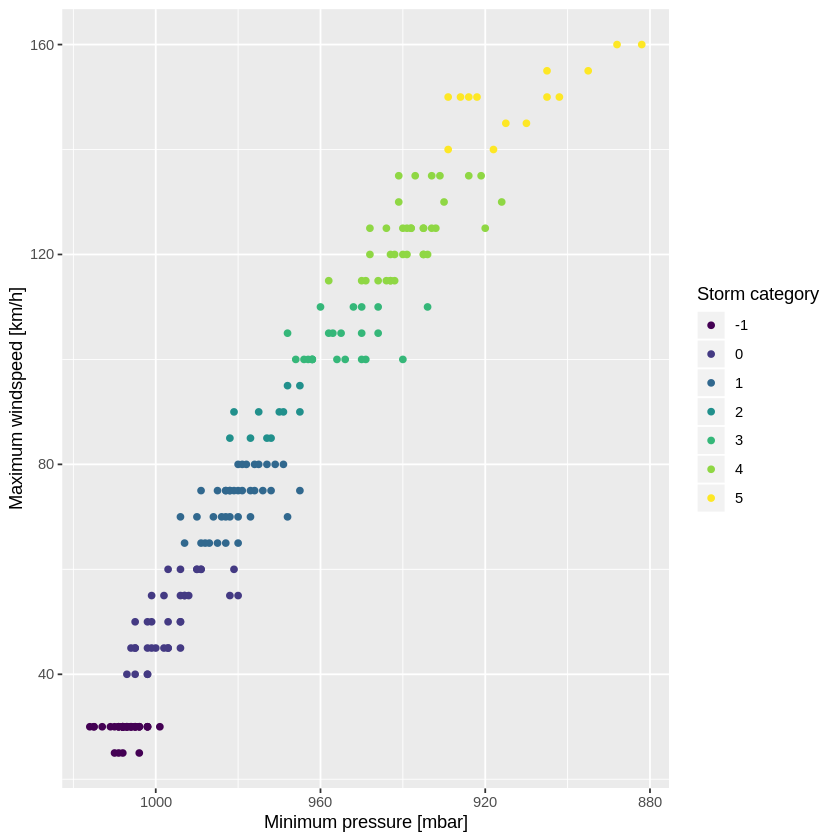

In [21]:
storms_nested %>%
    ggplot(aes(x=min_pressure,y=max_wind,color=max_category)) +
    geom_point() +
    scale_x_reverse() +
    labs(x='Minimum pressure [mbar]',y='Maximum windspeed [km/h]',color='Storm category')